   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

<ipython-input-16-2f64fd4dce19>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-16-2f64fd4dce19>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

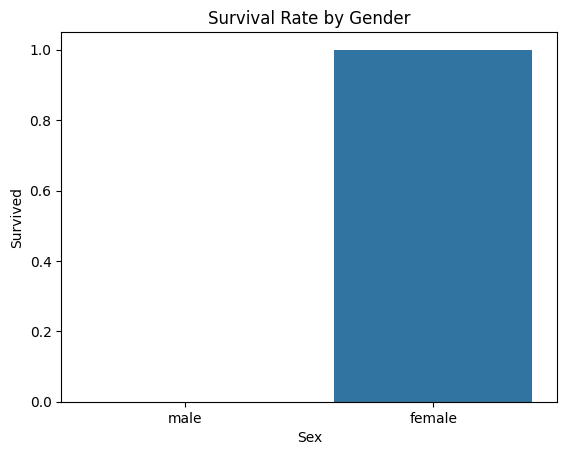

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


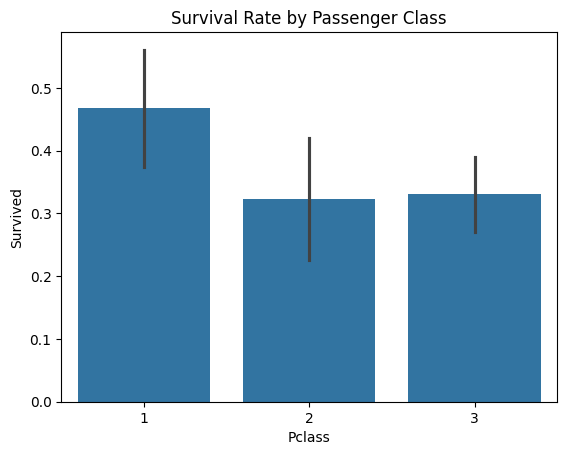

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = '/content/tested.csv'
df = pd.read_csv(url)


print(df.head())

print(df.info())
print(df.describe())

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


print(df.isnull().sum())

gender_survival = df.groupby('Sex')['Survived'].mean()

print(gender_survival)


sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

class_survival = df.groupby('Pclass')['Survived'].mean()

print(class_survival)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

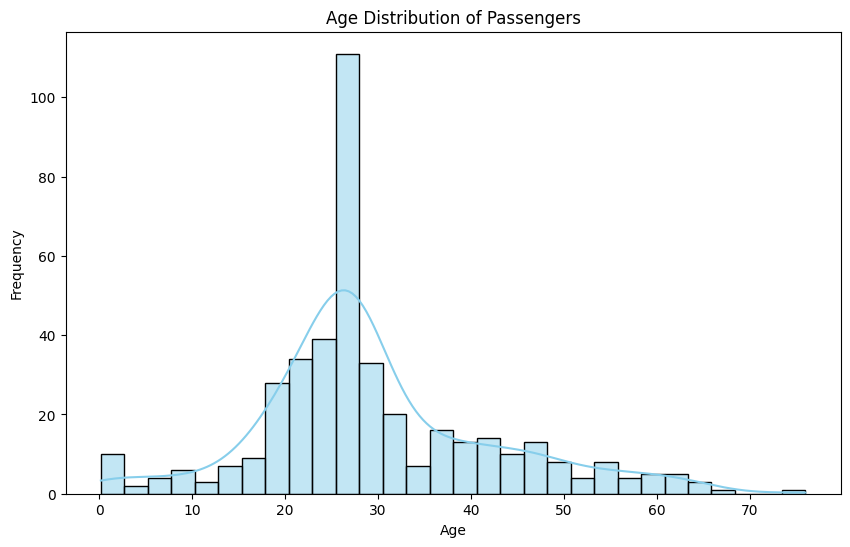

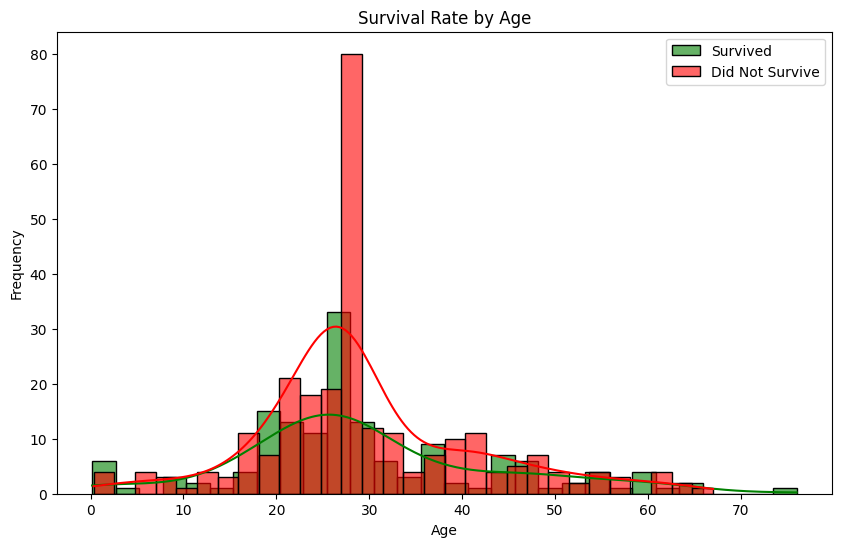

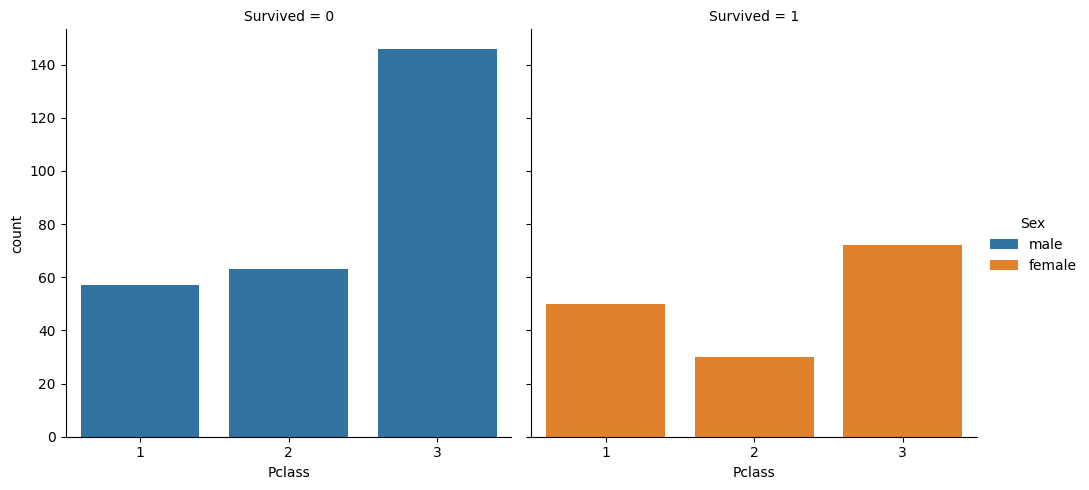

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


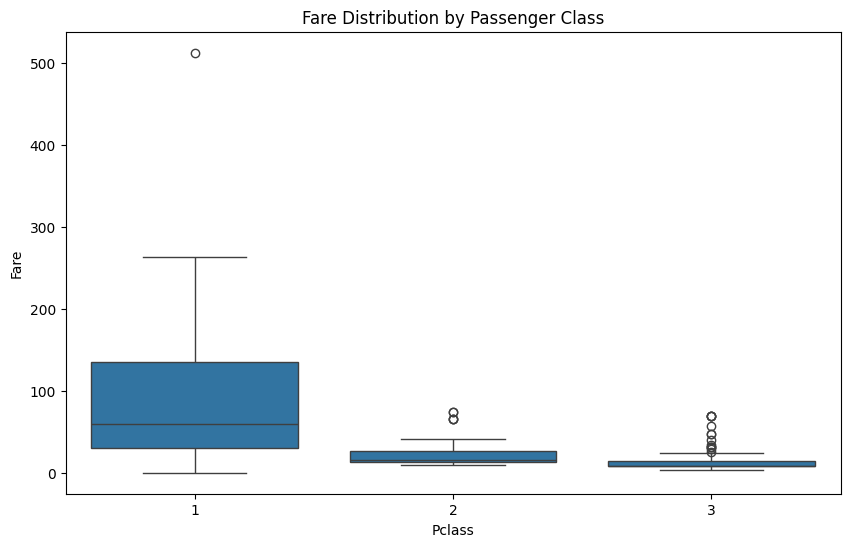

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived', alpha=0.6)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did Not Survive', alpha=0.6)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()